<a href="https://colab.research.google.com/github/andhikaaria/MachineLearning/blob/main/mgg6/K_Means_Clustering_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/median_average_wages.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)

# Sekarang df adalah dataframe yang berisi data dari dataset
# Anda dapat melakukan operasi dan analisis data lebih lanjut dengan dataframe ini


In [13]:
print(df)
df.columns

    year  median  average  men_median  men_average  women_median  \
0   2022   22.88    32.00       24.91        35.82         20.74   
1   2021   23.05    32.08       24.93        35.61         21.46   
2   2020   23.64    32.54       25.95        36.03         21.72   
3   2019   22.12    30.36       24.04        33.65         20.42   
4   2018   21.90    29.83       23.42        33.19         19.73   
5   2017   21.55    29.21       23.78        32.27         19.69   
6   2016   21.36    29.00       23.44        32.18         19.44   
7   2015   20.99    28.43       23.19        31.52         19.07   
8   2014   20.65    27.36       22.43        30.08         18.63   
9   2013   20.63    27.54       22.63        30.49         18.87   
10  2012   20.53    27.41       22.87        30.45         19.01   
11  2011   20.79    27.26       22.76        29.99         19.34   
12  2010   21.32    27.84       23.34        30.85         19.47   
13  2009   21.45    27.90       23.90        31.

Index(['year', 'median', 'average', 'men_median', 'men_average',
       'women_median', 'women_average', 'white_median', 'white_average',
       'black_median', 'black_average', 'hispanic_median', 'hispanic_average',
       'white_men_median', 'white_men_average', 'black_men_median',
       'black_men_average', 'hispanic_men_median', 'hispanic_men_average',
       'white_women_median', 'white_women_average', 'black_women_median',
       'black_women_average', 'hispanic_women_median',
       'hispanic_women_average', 'recent_high-school_graduate',
       'men_recent_high-school_graduate', 'women_recent_high-school_graduate',
       'recent_college_graduate', 'men_recent_college_graduate',
       'women_recent_college_graduate'],
      dtype='object')

In [14]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={
    "men_median": "man_median",
    "men_average": "man_average"
})

In [15]:
# Menghapus kolom "CustomerID" dan "Gender" dari dataframe
df = df.drop(columns=["recent_high-school_graduate", "recent_college_graduate"])
df.head()

,year,median,average,man_median,man_average,women_median,women_average,white_median,white_average,black_median,...,white_women_median,white_women_average,black_women_median,black_women_average,hispanic_women_median,hispanic_women_average,men_recent_high-school_graduate,women_recent_high-school_graduate,men_recent_college_graduate,women_recent_college_graduate
0,2022,22.88,32.00,24.91,35.82,20.74,27.86,24.96,34.49,19.60,...,22.47,29.50,19.00,23.99,17.54,22.60,16.86,14.77,28.24,23.74
1,2021,23.05,32.08,24.93,35.61,21.46,28.28,25.40,34.50,19.45,...,22.76,29.90,18.85,24.13,17.77,22.90,15.86,14.33,28.66,23.47
2,2020,23.64,32.54,25.95,36.03,21.72,28.75,25.98,34.86,19.85,...,23.05,30.30,19.26,24.87,17.55,23.03,15.48,13.55,29.01,26.26
3,2019,22.12,30.36,24.04,33.65,20.42,26.83,24.39,32.79,18.45,...,22.01,28.41,18.08,23.17,17.08,21.50,15.36,13.47,26.59,23.30
4,2018,21.90,29.83,23.42,33.19,19.73,26.21,23.97,32.44,17.57,...,21.75,28.01,17.34,22.55,16.24,20.60,14.59,12.71,25.66,22.84


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

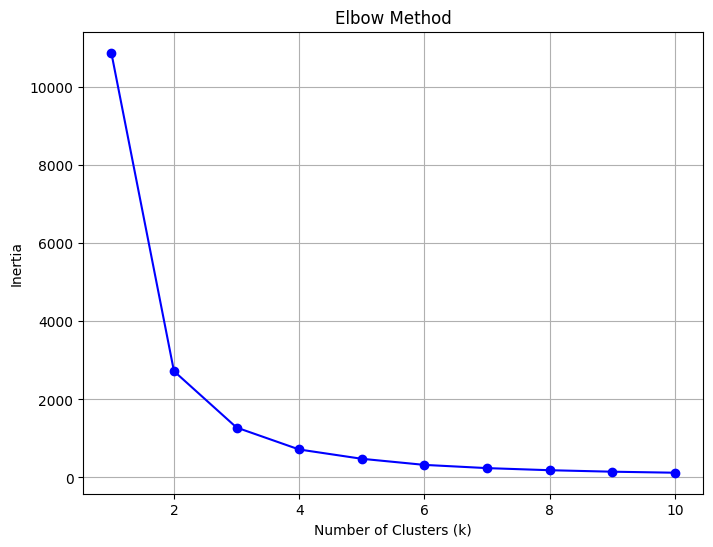

In [17]:

# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['year', 'median', 'average']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


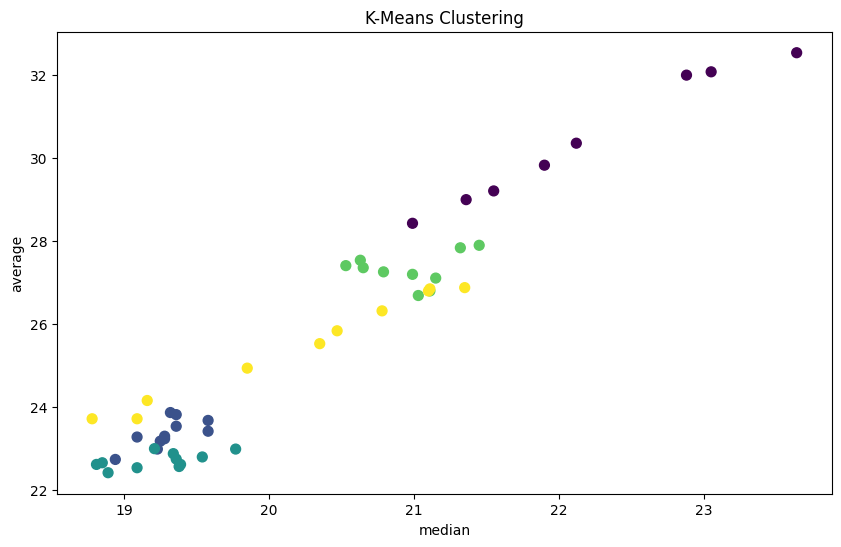

In [18]:
# Pilih atribut yang akan digunakan dalam K-Means Clustering
attributes = df[['year', 'median', 'average']]

# Membuat model K-Means Clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(attributes)

# Menambahkan kolom 'label' ke dataframe df
df['label'] = kmeans.labels_

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['median'], df['average'], c=df['label'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('median')
plt.ylabel('average')
plt.show()


In [19]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.6137
Silhouette Score for k=3: 0.5526
Silhouette Score for k=4: 0.5306
Silhouette Score for k=5: 0.5043
Silhouette Score for k=6: 0.4965
Silhouette Score for k=7: 0.4794
Silhouette Score for k=8: 0.4650
Silhouette Score for k=9: 0.4694
Silhouette Score for k=10: 0.4409


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.5006
Davies-Bouldin Index for k=3: 0.5273
Davies-Bouldin Index for k=4: 0.5206
Davies-Bouldin Index for k=5: 0.5266
Davies-Bouldin Index for k=6: 0.5204
Davies-Bouldin Index for k=7: 0.5235
Davies-Bouldin Index for k=8: 0.5212
Davies-Bouldin Index for k=9: 0.5015
Davies-Bouldin Index for k=10: 0.5181
